### Amazon Stock Prediction

Name : Priyanka Nigade <br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# calculate cross validation score and under the roc curve socring
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [2]:
# install yfinance and GOOGLEFINANCE

#pip install yfinance
#pip install GOOGLEFINANCE

### Load Data 

In [3]:
# Loaded stock data of amazon using yfinance API

amazon_data = yf.download("AMZN", start="2010-01-01", end="2022-01-15")


[*********************100%***********************]  1 of 1 completed


In [4]:
amazon_data.shape

(3031, 6)

In [5]:
amazon_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500


* Open/Close — Captures the opening/closing price of the stock <br>
* Adj_Open/Adj_Close — An adjusted opening/closing price is a stock’s price on any given day of trading that has been   revised to include any dividend distributions, stock splits, and other corporate actions that occurred at any time     before the next day’s open. <br>
* Volume — It records the number of shares that are being traded on any given day of trading.<br>
* High/Low — It tracks the highest and the lowest price of the stock during a particular day of trading.


### Exploratory Data Analysis

In [6]:
# check for data type and missing values

amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3031 entries, 2010-01-04 to 2022-01-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3031 non-null   float64
 1   High       3031 non-null   float64
 2   Low        3031 non-null   float64
 3   Close      3031 non-null   float64
 4   Adj Close  3031 non-null   float64
 5   Volume     3031 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 165.8 KB


In [7]:
amazon_data.duplicated().sum()

0

In [8]:
features = amazon_data.columns
features

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


#sns.boxplot(x=amazon_data['Open'])<br>
**** Just removing outliers from the stock time series is generally a bad idea: these are the days with the biggest profits and losses
    

In [9]:
# Normalize the data 

In [10]:
# find the min max of the column
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [11]:
amazon_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500
...,...,...,...,...,...,...
2022-01-10,3211.709961,3233.229980,3126.090088,3229.719971,3229.719971,4389900
2022-01-11,3230.000000,3327.000000,3214.030029,3307.239990,3307.239990,3140300
2022-01-12,3331.500000,3337.560059,3288.340088,3304.139893,3304.139893,2501500


**** Just removing outliers from the stock time series is generally a bad idea: these are the days with the biggest profits and losses


### Function for ML Classifier Models:
1_ K-Nearest Neighbors (KNN) <br>
2_ Random Forest Classifier (RF) <br>
3_ Gradient Boosting Classifier (GB) <br>
4_ Support Vector Machines (SVMs) <br>
5_ XGBoost Classifier


In [12]:
score_df = pd.DataFrame(columns = ['Classifier', 'Stategy', 'Accuracy', 'Precision', 'Recall'])

#### 1. K-Nearest Neighbors (KNN)

In [13]:
# created function to get Accuracy, Precision, Recall

def model_accuracy_precision_recall(y_test, y_pred):
    print("\n\n===== Accuracy, Precision, Recall =====")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))

In [14]:
def store_modelscore(algo, stategy, y_test, y_pred):
    
    # Store the scores for comparision  
    
    acc = metrics.accuracy_score(y_test, y_pred)
    pre = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    #print(acc, pre, rec)
    score_df = score_df.append({'Classifier' : algo, 'Stategy' : stategy, 'Accuracy' : acc, 'Precision': pre,'Recall': rec}, 
                ignore_index = True)
    
    print(score_df)


In [15]:
def fitdatato_knnmodel(Stategy, X_train, y_train, X_test, y_test):
    # Building K-Nearest Neighbors model 
    knearest = KNeighborsClassifier()

    # fit the model with data
    knearest.fit(X_train, y_train)
    
    # Predict the X_test using KNN
    y_pred=knearest.predict(X_test)

    print("\n\n===== confusion matrix =====")
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
    
    model_accuracy_precision_recall(y_test, y_pred)
    print("\n\n=================== classification report ===================")
    print(classification_report(y_test, y_pred))
    #store_modelscore('KNN', Stategy, y_test, y_pred)    
    
    return y_pred


#### 2. Random Forest Classifier (RF)

In [16]:
def fitdatato_rfmodel(Stategy, X_train, y_train, X_test, y_test):
    # Building Random Forest model 
    random_forest = RandomForestClassifier()

    # fit the model with data
    random_forest.fit(X_train, y_train)

    # Predict the Xtest data with random_forest  model 
    y_pred = random_forest.predict(X_test)

    print("\n\n===== confusion matrix =====")
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
    
    model_accuracy_precision_recall(y_test, y_pred)
    print("\n\n=================== classification report ===================")
    print(classification_report(y_test, y_pred))
    
    #store_modelscore('RF', Stategy, y_test, y_pred)  
    return y_pred

#### 3) Gradient Boosting Classifier (GB)

In [17]:

def fitdatato_gradient_boostermodel(Stategy, X_train, y_train, X_test, y_test):
    # Building gradient_booster model 
    gradient_booster = GradientBoostingClassifier()

    # fit the model with data
    gradient_booster.fit(X_train, y_train)

    # Predict the Xtest data with random_forest  model 
    y_pred = gradient_booster.predict(X_test)

    print("\n\n===== confusion matrix =====")
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
   
    model_accuracy_precision_recall(y_test, y_pred)
    print("\n\n=================== classification report ===================")
    print(classification_report(y_test, y_pred))
    
    #store_modelscore('GB', Stategy, y_test, y_pred)  
    return y_pred

#### 4) Support Vector Machines (SVMs)

In [18]:

def fitdatato_svmmodel(Stategy, X_train, y_train, X_test, y_test):
    # Building gradient_booster model 
    gradient_booster = GradientBoostingClassifier()

    # fit the model with data
    gradient_booster.fit(X_train, y_train)

    # Predict the Xtest data with random_forest  model 
    y_pred = gradient_booster.predict(X_test)

    print("\n\n===== confusion matrix =====")
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
   
    model_accuracy_precision_recall(y_test, y_pred)
    print("\n\n=================== classification report ===================")
    print(classification_report(y_test, y_pred))
    
    #store_modelscore('GB', Stategy, y_test, y_pred)    
    return y_pred

#### 5) XGBoost Classifier

In [19]:
def fitdatato_xgboostmodel(Stategy, X_train, y_train, X_test, y_test):
    
    #The XG boosting decision tree algorithm.
    xcb_model = XGBClassifier()

    # fit the model with data
    xcb_model.fit(X_train, y_train)

    # Predict the Xtest data with XG model 
    y_pred = xcb_model.predict(X_test)

    print("\n\n===== confusion matrix =====")
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
                           
    model_accuracy_precision_recall(y_test, y_pred)
    print("\n\n=================== classification report ===================")
    print(classification_report(y_test, y_pred))
    return y_pred

###  Strategy-1: 
If the next trading day's close price is greater than today's close price then,  the signal is ‘buy’,  otherwise ‘sell’.

In [20]:
amazon_data_stat1 = amazon_data.copy()

In [21]:
# normalize the values
for col in amazon_data_stat1.columns:
        amazon_data_stat1[col] = min_max_scaling(amazon_data_stat1[col])

In [22]:
# Parameterized XGBoost gives error label value -1

amazon_data_stat1['label'] = np.where(amazon_data_stat1['Close'].shift(-1) > amazon_data_stat1['Close'], 1, 0)

In [23]:
amazon_data_stat1['label'].value_counts()

1    1608
0    1423
Name: label, dtype: int64

In [24]:
# fig, ax = plt.subplots(figsize=(12,12))
# sns.heatmap(amazon_data_stat1.corr(), annot=True, cmap=plt.cm.Greens)
# plt.show()

### Spilt the data into training and test datasets (use the 80,20 percent ratio.)

In [25]:
label = amazon_data_stat1['label']
features_col = amazon_data_stat1.drop(['label'], axis = 1)


In [26]:
# Dividing the dataset in train (80%) and test (20%)

X_train, X_test, y_train, y_test = train_test_split(features_col, label, test_size = 0.3, random_state = 40)


#### 1)  KNN

In [27]:
y_pred = fitdatato_knnmodel('Stategy1', X_train, y_train, X_test, y_test)


acc_knn_stat1 = metrics.accuracy_score(y_test, y_pred)
pre_knn_stat1 = metrics.precision_score(y_test, y_pred)
rec_knn_stat1 = metrics.recall_score(y_test, y_pred)

score_df = score_df.append({'Classifier' : 'KNN', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_knn_stat1, 'Precision': pre_knn_stat1,'Recall': rec_knn_stat1}, 
                ignore_index = True)




===== confusion matrix =====
[[191 237]
 [208 274]]


===== Accuracy, Precision, Recall =====
Accuracy: 0.510989010989011
Precision: 0.5362035225048923
Recall: 0.5684647302904564


=================== classification report ===================
              precision    recall  f1-score   support

           0       0.48      0.45      0.46       428
           1       0.54      0.57      0.55       482

    accuracy                           0.51       910
   macro avg       0.51      0.51      0.51       910
weighted avg       0.51      0.51      0.51       910



In [28]:
score_df

,Classifier,Stategy,Accuracy,Precision,Recall
0,KNN,Stategy 1,0.510989,0.536204,0.568465


#### 2) Random Forest

In [29]:
y_pred = fitdatato_rfmodel('Stategy1', X_train, y_train, X_test, y_test)

acc_rf_stat1 = metrics.accuracy_score(y_test, y_pred)
pre_rf_stat1 = metrics.precision_score(y_test, y_pred)
rec_rf_stat1 = metrics.recall_score(y_test, y_pred)

score_df = score_df.append({'Classifier' : 'RF', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_rf_stat1, 'Precision': pre_rf_stat1,'Recall': rec_rf_stat1}, 
                ignore_index = True)




===== confusion matrix =====
[[180 248]
 [205 277]]


===== Accuracy, Precision, Recall =====
Accuracy: 0.5021978021978022
Precision: 0.5276190476190477
Recall: 0.5746887966804979


=================== classification report ===================
              precision    recall  f1-score   support

           0       0.47      0.42      0.44       428
           1       0.53      0.57      0.55       482

    accuracy                           0.50       910
   macro avg       0.50      0.50      0.50       910
weighted avg       0.50      0.50      0.50       910



#### 3) Gradient Booster

In [30]:
y_pred = fitdatato_gradient_boostermodel('Stategy1', X_train, y_train, X_test, y_test)

acc_gb_stat1 = metrics.accuracy_score(y_test, y_pred)
pre_gb_stat1 = metrics.precision_score(y_test, y_pred)
rec_gb_stat1 = metrics.recall_score(y_test, y_pred)

score_df = score_df.append({'Classifier' : 'GB', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_gb_stat1, 'Precision': pre_gb_stat1,'Recall': rec_gb_stat1}, 
                ignore_index = True)



===== confusion matrix =====
[[134 294]
 [144 338]]


===== Accuracy, Precision, Recall =====
Accuracy: 0.5186813186813187
Precision: 0.5348101265822784
Recall: 0.7012448132780082


=================== classification report ===================
              precision    recall  f1-score   support

           0       0.48      0.31      0.38       428
           1       0.53      0.70      0.61       482

    accuracy                           0.52       910
   macro avg       0.51      0.51      0.49       910
weighted avg       0.51      0.52      0.50       910



#### 4) Support Vector Machines (SVMs)

In [31]:
y_pred = fitdatato_svmmodel('Stategy1', X_train, y_train, X_test, y_test)

acc_svm_stat1 = metrics.accuracy_score(y_test, y_pred)
pre_svm_stat1 = metrics.precision_score(y_test, y_pred)
rec_svm_stat1 = metrics.recall_score(y_test, y_pred)

score_df = score_df.append({'Classifier' : 'SVM', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_svm_stat1, 'Precision': pre_svm_stat1,'Recall': rec_svm_stat1}, 
                ignore_index = True)




===== confusion matrix =====
[[133 295]
 [151 331]]


===== Accuracy, Precision, Recall =====
Accuracy: 0.5098901098901099
Precision: 0.5287539936102237
Recall: 0.6867219917012448


=================== classification report ===================
              precision    recall  f1-score   support

           0       0.47      0.31      0.37       428
           1       0.53      0.69      0.60       482

    accuracy                           0.51       910
   macro avg       0.50      0.50      0.49       910
weighted avg       0.50      0.51      0.49       910



#### 5) XGBoost

In [32]:
y_pred_xg = fitdatato_xgboostmodel('Stategy1', X_train, y_train, X_test, y_test)

acc_xgb_stat1 = metrics.accuracy_score(y_test, y_pred_xg)
pre_xgb_stat1 = metrics.precision_score(y_test, y_pred_xg)
rec_xgb_stat1 = metrics.recall_score(y_test, y_pred_xg)

score_df = score_df.append({'Classifier' : 'XGBoost', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_xgb_stat1, 'Precision': pre_xgb_stat1,'Recall': rec_xgb_stat1}, 
                ignore_index = True)

[16:57:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


===== confusion matrix =====
[[179 249]
 [197 285]]


===== Accuracy, Precision, Recall =====
Accuracy: 0.5098901098901099
Precision: 0.5337078651685393
Recall: 0.5912863070539419


=================== classification report ===================
              precision    recall  f1-score   support

           0       0.48      0.42      0.45       428
           1       0.53      0.59      0.56       482

    accuracy                           0.51       910
   macro avg       0.50      0.50      0.50       910
weighted avg       0.51      0.51      0.51       910



/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### Strategy-2: 
Utilize the 50-day moving average vs the 200-day moving average.

In [33]:
amazon_data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500
...,...,...,...,...,...,...
2022-01-10,3211.709961,3233.229980,3126.090088,3229.719971,3229.719971,4389900
2022-01-11,3230.000000,3327.000000,3214.030029,3307.239990,3307.239990,3140300
2022-01-12,3331.500000,3337.560059,3288.340088,3304.139893,3304.139893,2501500


In [34]:
# Computing the rolling averages

amazon_data_stat2 = amazon_data.copy()

amazon_data_stat2['50_dsmv'] = amazon_data_stat2['Adj Close'].rolling(50).mean()
amazon_data_stat2['200_dsmv'] = amazon_data_stat2['Adj Close'].rolling(200).mean()

amazon_data_stat2 = amazon_data_stat2.dropna()

amazon_data_stat2['label'] = amazon_data_stat2.apply(lambda row:0 if row[f'50_dsmv'] > row[f'200_dsmv'] else 1, axis = 1)


In [35]:
amazon_data_stat2

,Open,High,Low,Close,Adj Close,Volume,50_dsmv,200_dsmv,label
Date,,,,,,,,,
2010-10-18,165.000000,165.190002,161.820007,163.559998,163.559998,6331300,142.810600,130.500000,0
2010-10-19,160.679993,162.800003,157.000000,158.669998,158.669998,7525000,143.407400,130.623850,0
2010-10-20,158.779999,159.869995,156.570007,158.669998,158.669998,5790400,143.980800,130.743750,0
2010-10-21,162.669998,166.130005,161.289993,164.970001,164.970001,13482500,144.762400,130.907350,0
2010-10-22,162.449997,170.169998,162.270004,169.130005,169.130005,16318400,145.613800,131.103000,0
...,...,...,...,...,...,...,...,...,...
2022-01-10,3211.709961,3233.229980,3126.090088,3229.719971,3229.719971,4389900,3444.269214,3391.432203,0
2022-01-11,3230.000000,3327.000000,3214.030029,3307.239990,3307.239990,3140300,3442.965415,3392.589753,0
2022-01-12,3331.500000,3337.560059,3288.340088,3304.139893,3304.139893,2501500,3442.686011,3393.834003,0


### Plot

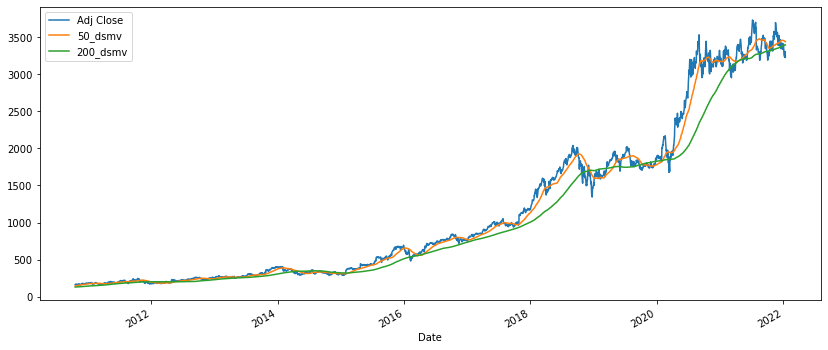

In [36]:
amazon_data_stat2['Adj Close'].plot()
amazon_data_stat2['50_dsmv'].plot(figsize= (14, 6))
amazon_data_stat2['200_dsmv'].plot(figsize= (14, 6))
plt.legend()

In [37]:
amazon_data_stat2

,Open,High,Low,Close,Adj Close,Volume,50_dsmv,200_dsmv,label
Date,,,,,,,,,
2010-10-18,165.000000,165.190002,161.820007,163.559998,163.559998,6331300,142.810600,130.500000,0
2010-10-19,160.679993,162.800003,157.000000,158.669998,158.669998,7525000,143.407400,130.623850,0
2010-10-20,158.779999,159.869995,156.570007,158.669998,158.669998,5790400,143.980800,130.743750,0
2010-10-21,162.669998,166.130005,161.289993,164.970001,164.970001,13482500,144.762400,130.907350,0
2010-10-22,162.449997,170.169998,162.270004,169.130005,169.130005,16318400,145.613800,131.103000,0
...,...,...,...,...,...,...,...,...,...
2022-01-10,3211.709961,3233.229980,3126.090088,3229.719971,3229.719971,4389900,3444.269214,3391.432203,0
2022-01-11,3230.000000,3327.000000,3214.030029,3307.239990,3307.239990,3140300,3442.965415,3392.589753,0
2022-01-12,3331.500000,3337.560059,3288.340088,3304.139893,3304.139893,2501500,3442.686011,3393.834003,0


In [38]:
# amazon_data_stat2['label'].value_counts()

In [39]:
amazon_data_stat2.shape


(2832, 9)

In [40]:
amazon_data_stat2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2832 entries, 2010-10-18 to 2022-01-14
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2832 non-null   float64
 1   High       2832 non-null   float64
 2   Low        2832 non-null   float64
 3   Close      2832 non-null   float64
 4   Adj Close  2832 non-null   float64
 5   Volume     2832 non-null   int64  
 6   50_dsmv    2832 non-null   float64
 7   200_dsmv   2832 non-null   float64
 8   label      2832 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 221.2 KB


In [41]:
# fig, ax = plt.subplots(figsize=(12,12))
# sns.heatmap(amazon_data_stat2.corr(), annot=True, cmap=plt.cm.Greens)
# plt.show()

### Dividing the dataset in train (80%) and test (20%)

In [42]:
# Dividing the dataset in train (80%) and test (20%)
label_stat2 = amazon_data_stat2['label']
features_col_stat2 = amazon_data_stat2.drop(['label'], axis = 1)

X_train_stat2, X_test_stat2, y_train_stat2, y_test_stat2 = train_test_split(features_col_stat2, label_stat2, test_size = 0.2, random_state = 40)


#### 1) KNN

In [43]:
y_pred = fitdatato_knnmodel('Stategy2', X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2)

acc_knn_stat2 = metrics.accuracy_score(y_test_stat2, y_pred)
pre_knn_stat2 = metrics.precision_score(y_test_stat2, y_pred)
rec_knn_stat2 = metrics.recall_score(y_test_stat2, y_pred)

score_df = score_df.append({'Classifier' : 'KNN', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_knn_stat2, 'Precision': pre_knn_stat2,'Recall': rec_knn_stat2}, 
                ignore_index = True)



===== confusion matrix =====
[[445  17]
 [ 99   6]]


===== Accuracy, Precision, Recall =====
Accuracy: 0.7954144620811288
Precision: 0.2608695652173913
Recall: 0.05714285714285714


=================== classification report ===================
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       462
           1       0.26      0.06      0.09       105

    accuracy                           0.80       567
   macro avg       0.54      0.51      0.49       567
weighted avg       0.71      0.80      0.74       567



#### 2) Random forest

In [44]:
y_pred = fitdatato_rfmodel('Stategy2', X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2)

acc_rf_stat2 = metrics.accuracy_score(y_test_stat2, y_pred)
pre_rf_stat2 = metrics.precision_score(y_test_stat2, y_pred)
rec_rf_stat2 = metrics.recall_score(y_test_stat2, y_pred)

score_df = score_df.append({'Classifier' : 'RF', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_rf_stat2, 'Precision': pre_rf_stat2,'Recall': rec_rf_stat2}, 
                ignore_index = True)



===== confusion matrix =====
[[462   0]
 [  3 102]]


===== Accuracy, Precision, Recall =====
Accuracy: 0.9947089947089947
Precision: 1.0
Recall: 0.9714285714285714


=================== classification report ===================
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       462
           1       1.00      0.97      0.99       105

    accuracy                           0.99       567
   macro avg       1.00      0.99      0.99       567
weighted avg       0.99      0.99      0.99       567



#### 3) Gradient Booster

In [45]:
y_pred = fitdatato_gradient_boostermodel('Stategy2', X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2)

acc_gb_stat2 = metrics.accuracy_score(y_test_stat2, y_pred)
pre_gb_stat2 = metrics.precision_score(y_test_stat2, y_pred)
rec_gb_stat2 = metrics.recall_score(y_test_stat2, y_pred)

score_df = score_df.append({'Classifier' : 'GB', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_gb_stat2, 'Precision': pre_gb_stat2,'Recall': rec_gb_stat2}, 
                ignore_index = True)



===== confusion matrix =====
[[458   4]
 [  0 105]]


===== Accuracy, Precision, Recall =====
Accuracy: 0.9929453262786596
Precision: 0.963302752293578
Recall: 1.0


=================== classification report ===================
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       462
           1       0.96      1.00      0.98       105

    accuracy                           0.99       567
   macro avg       0.98      1.00      0.99       567
weighted avg       0.99      0.99      0.99       567



#### 4) Support Vector Machines (SVMs)

In [46]:
y_pred = fitdatato_svmmodel('Stategy2', X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2)

acc_svm_stat2 = metrics.accuracy_score(y_test_stat2, y_pred)
pre_svm_stat2 = metrics.precision_score(y_test_stat2, y_pred)
rec_svm_stat2 = metrics.recall_score(y_test_stat2, y_pred)

score_df = score_df.append({'Classifier' : 'SVM', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_svm_stat2, 'Precision': pre_svm_stat2,'Recall': rec_svm_stat2}, 
                ignore_index = True)



===== confusion matrix =====
[[458   4]
 [  0 105]]


===== Accuracy, Precision, Recall =====
Accuracy: 0.9929453262786596
Precision: 0.963302752293578
Recall: 1.0


=================== classification report ===================
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       462
           1       0.96      1.00      0.98       105

    accuracy                           0.99       567
   macro avg       0.98      1.00      0.99       567
weighted avg       0.99      0.99      0.99       567



#### 5) XGBoost

In [47]:
y_pred = fitdatato_xgboostmodel('Stategy2', X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2)

acc_xgb_stat2 = metrics.accuracy_score(y_test_stat2, y_pred)
pre_xgb_stat2 = metrics.precision_score(y_test_stat2, y_pred)
rec_xgb_stat2 = metrics.recall_score(y_test_stat2, y_pred)

score_df = score_df.append({'Classifier' : 'XGBoost', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_xgb_stat2, 'Precision': pre_xgb_stat2,'Recall': rec_xgb_stat2}, 
                ignore_index = True)

[16:57:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


===== confusion matrix =====
[[461   1]
 [  0 105]]


===== Accuracy, Precision, Recall =====
Accuracy: 0.9982363315696648
Precision: 0.9905660377358491
Recall: 1.0


=================== classification report ===================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.99      1.00      1.00       105

    accuracy                           1.00       567
   macro avg       1.00      1.00      1.00       567
weighted avg       1.00      1.00      1.00       567



/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### Hypertuning some classifiers

### 1) KNN

In [48]:
def param_tuned_knn(X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2):
    #grid_params = { 'n_neighbors' : [5,7,9],
    #          'weights' : ['uniform','distance'],
    #           'metric' : ['minkowski','euclidean','manhattan']}

    #gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

    #g_res = gs.fit(X_train_stat2, y_train_stat2)

    # use the best hyperparameters
    knn = KNeighborsClassifier(n_neighbors = 17, weights = 'distance',algorithm = 'brute',metric = 'euclidean')
    
    # fit the model with data
    knn.fit(X_train_stat2, y_train_stat2)

    # Predict the Xtest data with knn model 
    y_pred = knn.predict(X_test_stat2)

    print("\n\n===== confusion matrix =====")
    cnf_matrix = metrics.confusion_matrix(y_test_stat2, y_pred)
    print(cnf_matrix)
   
    model_accuracy_precision_recall(y_test_stat2, y_pred)
    print("\n\n=================== classification report ===================")
    print(classification_report(y_test_stat2, y_pred))
    
    #store_modelscore('GB', Stategy, y_test, y_pred)    
    return y_pred
    

In [49]:
y_pred = param_tuned_knn(X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2)

acc_pramtuned_knn_stat2 = metrics.accuracy_score(y_test_stat2, y_pred)
pre_pramtuned_knn_stat2 = metrics.precision_score(y_test_stat2, y_pred)
rec_pramtuned_knn_stat2 = metrics.recall_score(y_test_stat2, y_pred)

score_df = score_df.append({'Classifier' : 'KNN Param tuned', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_pramtuned_knn_stat2, 'Precision': pre_pramtuned_knn_stat2,'Recall': rec_pramtuned_knn_stat2}, 
                ignore_index = True)



===== confusion matrix =====
[[451  11]
 [ 98   7]]


===== Accuracy, Precision, Recall =====
Accuracy: 0.8077601410934744
Precision: 0.3888888888888889
Recall: 0.06666666666666667


=================== classification report ===================
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       462
           1       0.39      0.07      0.11       105

    accuracy                           0.81       567
   macro avg       0.61      0.52      0.50       567
weighted avg       0.74      0.81      0.75       567



In [50]:
y_pred_stat1 = param_tuned_knn(X_train, y_train, X_test, y_test)

acc_pramtuned_knn_stat1 = metrics.accuracy_score(y_test, y_pred_stat1)
pre_pramtuned_knn_stat1 = metrics.precision_score(y_test, y_pred_stat1)
rec_pramtuned_knn_stat1 = metrics.recall_score(y_test, y_pred_stat1)

score_df = score_df.append({'Classifier' : 'KNN Param tuned', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_pramtuned_knn_stat1, 'Precision': pre_pramtuned_knn_stat1,'Recall': rec_pramtuned_knn_stat1}, 
                ignore_index = True)




===== confusion matrix =====
[[167 261]
 [199 283]]


===== Accuracy, Precision, Recall =====
Accuracy: 0.4945054945054945
Precision: 0.5202205882352942
Recall: 0.5871369294605809


=================== classification report ===================
              precision    recall  f1-score   support

           0       0.46      0.39      0.42       428
           1       0.52      0.59      0.55       482

    accuracy                           0.49       910
   macro avg       0.49      0.49      0.49       910
weighted avg       0.49      0.49      0.49       910



### 2) XGBoost

In [51]:
from scipy import stats
param_dist = {'n_estimators': stats.randint(550, 1200),
              'learning_rate': stats.uniform(0.01, 0.2),
              'subsample': stats.uniform(0.7, 0.3),
              'max_depth': [5, 6, 7, 8, 9, 10],
              'colsample_bytree': stats.uniform(0.5, 0.5),
              'min_child_weight': [2, 3, 4, 5]
             }

xgbc = XGBClassifier(use_label_encoder=False)



In [52]:
def param_tuned_xgb(xgbc, X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2):
    xgbc_paramtuned = RandomizedSearchCV(
        estimator=xgbc,
        param_distributions=param_dist,
        n_iter=10,
        cv=3,
        verbose=2,
        random_state=15,
        n_jobs = -1
    )

    xgbc_paramtuned.fit(X_train_stat2, y_train_stat2)
   
    y_pred = xgbc_paramtuned.best_estimator_.predict(X_test_stat2)

    print("\n\n===== confusion matrix =====")
    cnf_matrix = metrics.confusion_matrix(y_test_stat2, y_pred)
    print(cnf_matrix)
   
    model_accuracy_precision_recall(y_test_stat2, y_pred)
    print("\n\n=================== classification report ===================")
    print(classification_report(y_test_stat2, y_pred))
    
    #store_modelscore('GB', Stategy, y_test, y_pred)    
    return y_pred
    

In [53]:
y_pred_stat1 = param_tuned_xgb(xgbc, X_train, y_train, X_test, y_test)

acc_pramtuned_xgb_stat1 = metrics.accuracy_score(y_test, y_pred_stat1)
pre_pramtuned_xgb_stat1 = metrics.precision_score(y_test, y_pred_stat1)
rec_pramtuned_xgb_stat1 = metrics.recall_score(y_test, y_pred_stat1)

score_df = score_df.append({'Classifier' : 'XGB Param tuned', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_pramtuned_xgb_stat1, 'Precision': pre_pramtuned_xgb_stat1,'Recall': rec_pramtuned_xgb_stat1}, 
                ignore_index = True)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[16:57:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


===== confusion matrix =====
[[175 253]
 [209 273]]


===== Accuracy, Precision, Recall =====
Accuracy: 0.49230769230769234
Precision: 0.5190114068441065
Recall: 0.5663900414937759


=================== classification report ===================
              precision    recall  f1-score   support

           0       0.46      0.41      0.43       428
           1       0.52      0.57      0.54       482

    accuracy                           0.49       910
   macro avg       0.49      0.49      0.49       910
weighted avg       0.49      0.49      0.49       910



In [54]:
y_pred_stat2 = param_tuned_xgb(xgbc, X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2)

acc_pramtuned_xgb_stat2 = metrics.accuracy_score(y_test_stat2, y_pred_stat2)
pre_pramtuned_xgb_stat2 = metrics.precision_score(y_test_stat2, y_pred_stat2)
rec_pramtuned_xgb_stat2 = metrics.recall_score(y_test_stat2, y_pred_stat2)

score_df = score_df.append({'Classifier' : 'XGB Param tuned', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_pramtuned_xgb_stat2, 'Precision': pre_pramtuned_xgb_stat2,'Recall': rec_pramtuned_xgb_stat2}, 
                ignore_index = True)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[16:58:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


===== confusion matrix =====
[[462   0]
 [  1 104]]


===== Accuracy, Precision, Recall =====
Accuracy: 0.9982363315696648
Precision: 1.0
Recall: 0.9904761904761905


=================== classification report ===================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       1.00      0.99      1.00       105

    accuracy                           1.00       567
   macro avg       1.00      1.00      1.00       567
weighted avg       1.00      1.00      1.00       567



### Model Comparision 

In [55]:
## Score
score_df
score_df.sort_values(by='Accuracy', ascending=False)

,Classifier,Stategy,Accuracy,Precision,Recall
9,XGBoost,Stategy 2,0.998236,0.990566,1.000000
13,XGB Param tuned,Stategy 2,0.998236,1.000000,0.990476
6,RF,Stategy 2,0.994709,1.000000,0.971429
7,GB,Stategy 2,0.992945,0.963303,1.000000
8,SVM,Stategy 2,0.992945,0.963303,1.000000
10,KNN Param tuned,Stategy 2,0.807760,0.388889,0.066667
5,KNN,Stategy 2,0.795414,0.260870,0.057143
2,GB,Stategy 1,0.518681,0.534810,0.701245
0,KNN,Stategy 1,0.510989,0.536204,0.568465
3,SVM,Stategy 1,0.509890,0.528754,0.686722


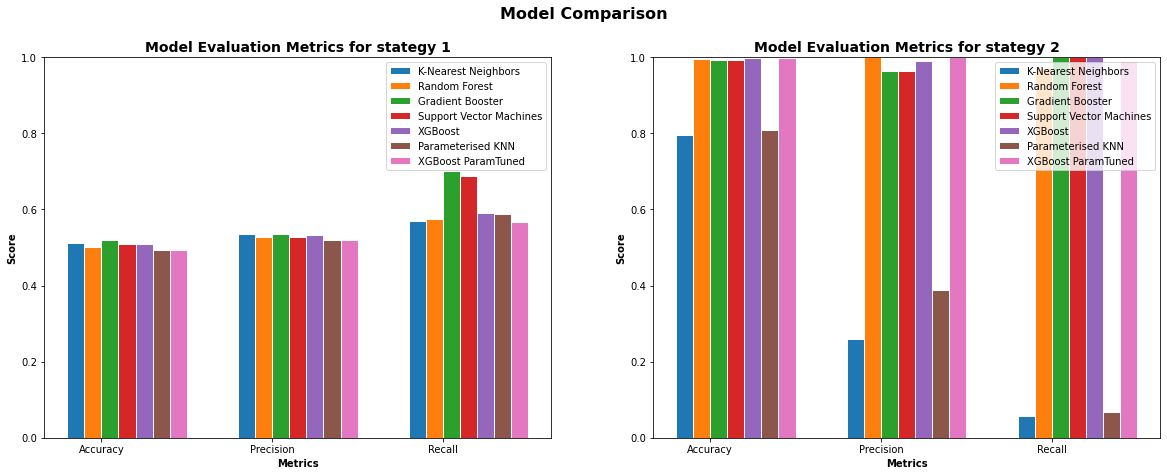

In [56]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)


fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(20)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1

knearest_score = [acc_knn_stat1, pre_knn_stat1, rec_knn_stat1]  
random_forest_score = [acc_rf_stat1, pre_rf_stat1, rec_rf_stat1]  
gradient_booster_score = [acc_gb_stat1, pre_gb_stat1, rec_gb_stat1] 
svm_score = [acc_svm_stat1, pre_svm_stat1, rec_svm_stat1] 
xgboost_score = [acc_xgb_stat1, pre_xgb_stat1, rec_xgb_stat1] 

knn_paramtuned_score1 = [acc_pramtuned_knn_stat1, pre_pramtuned_knn_stat1, rec_pramtuned_knn_stat1] 
xgboost_paramtuned_score1 = [acc_pramtuned_xgb_stat1, pre_pramtuned_xgb_stat1, rec_pramtuned_xgb_stat1]  


## Set position of bar on X axis
r1 = np.arange(len(knearest_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]


## Make the plot
ax1.bar(r1, knearest_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r2, random_forest_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, gradient_booster_score, width=barWidth, edgecolor='white', label='Gradient Booster')
ax1.bar(r4, svm_score, width=barWidth, edgecolor='white', label='Support Vector Machines')
ax1.bar(r5, xgboost_score, width=barWidth, edgecolor='white', label='XGBoost')

ax1.bar(r6, knn_paramtuned_score1, width=barWidth, edgecolor='white', label='Parameterised KNN')
ax1.bar(r7, xgboost_paramtuned_score1, width=barWidth, edgecolor='white', label='XGBoost ParamTuned')



## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(knearest_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Model Evaluation Metrics for stategy 1', fontsize=14, fontweight='bold')
ax1.legend()


fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(20)
fig.set_facecolor('white')

# Second plot
## set bar size
barWidth = 0.1

knearest_score2 = [acc_knn_stat2, pre_knn_stat2, rec_knn_stat2]  
random_forest_score2 = [acc_rf_stat2, pre_rf_stat2, rec_rf_stat2]  
gradient_booster_score2 = [acc_gb_stat2, pre_gb_stat2, rec_gb_stat2] 
svm_score2 = [acc_svm_stat2, pre_svm_stat2, rec_svm_stat2] 
xgboost_score2 = [acc_xgb_stat2, pre_xgb_stat2, rec_xgb_stat2] 

knn_paramtuned_score2 = [acc_pramtuned_knn_stat2, pre_pramtuned_knn_stat2, rec_pramtuned_knn_stat2] 
xgboost_paramtuned_score2 = [acc_pramtuned_xgb_stat2, pre_pramtuned_xgb_stat2, rec_pramtuned_xgb_stat2]  


## Set position of bar on X axis
p1 = np.arange(len(knearest_score2))
p2 = [x + barWidth for x in p1]
p3 = [x + barWidth for x in p2]
p4 = [x + barWidth for x in p3]
p5 = [x + barWidth for x in p4]
p6 = [x + barWidth for x in p5]
p7 = [x + barWidth for x in p6]




## Make the plot
ax2.bar(p1, knearest_score2, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax2.bar(p2, random_forest_score2, width=barWidth, edgecolor='white', label='Random Forest')
ax2.bar(p3, gradient_booster_score2, width=barWidth, edgecolor='white', label='Gradient Booster')
ax2.bar(p4, svm_score2, width=barWidth, edgecolor='white', label='Support Vector Machines')
ax2.bar(p5, xgboost_score2, width=barWidth, edgecolor='white', label='XGBoost')

ax2.bar(p6, knn_paramtuned_score2, width=barWidth, edgecolor='white', label='Parameterised KNN')
ax2.bar(p7, xgboost_paramtuned_score2, width=barWidth, edgecolor='white', label='XGBoost ParamTuned')


## Configure x and y axis
ax2.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall']
ax2.set_xticks([r + (barWidth * 1.5) for r in range(len(knearest_score2))], )
ax2.set_xticklabels(labels)
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_ylim(0, 1)

## Create legend & title
ax2.set_title('Model Evaluation Metrics for stategy 2', fontsize=14, fontweight='bold')
ax2.legend()

plt.show()


### Thank You😊